In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
NY_listings = pd.read_csv('AB_NYC_2019.csv')
print(NY_listings.shape)
NY_listings.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<function seaborn.utils.despine>

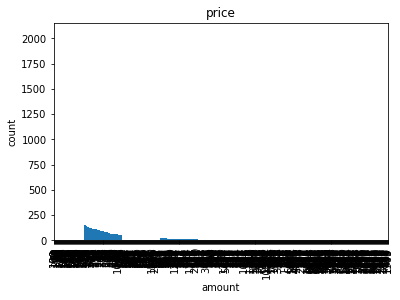

In [6]:
NY_listings['price'].value_counts().plot(kind='bar')
plt.title('price')
plt.xlabel('amount')
plt.ylabel('count')
sns.despine

Airbnb location based on latidute and longitude in NY


C:\Users\guill\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

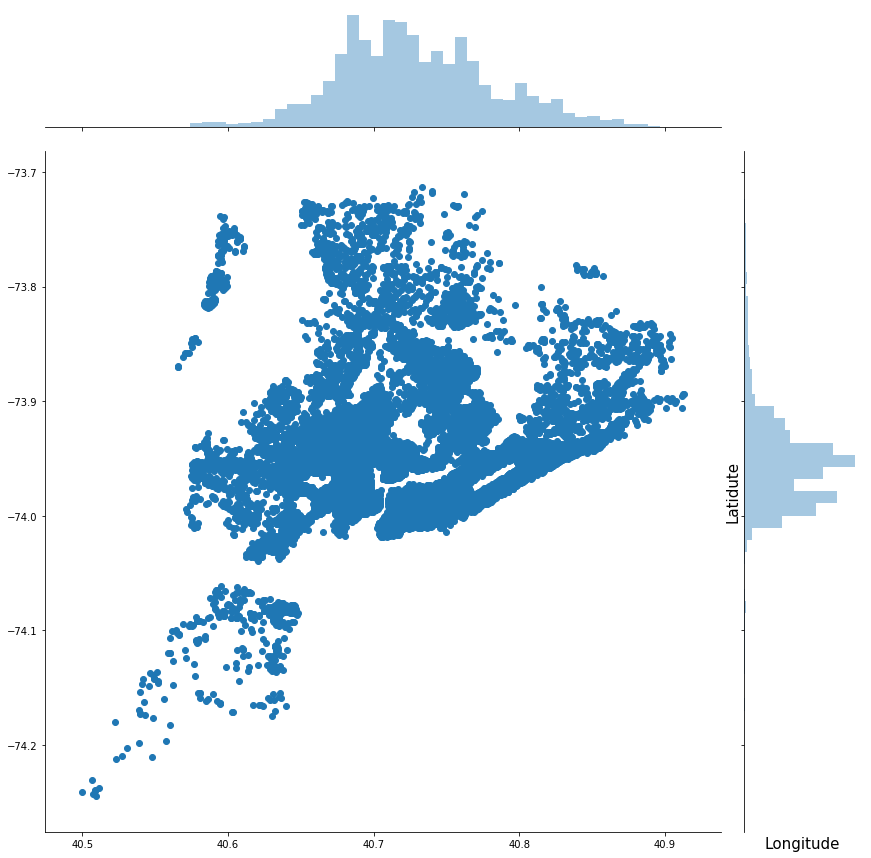

we can see where are the most airbnb located based on the plot points, this would help you decide where is the best location for you to get you own Airbnb to rent


In [7]:
print 'Airbnb location based on latidute and longitude in NY' 
plt.figure(figsize=(12,12))
sns.jointplot(x=NY_listings.latitude.values, y=NY_listings.longitude.values, size=12)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latidute', fontsize=15)
plt.show()
sns.despine
print 'we can see where are the most airbnb located based on the plot points, this would help you decide where is the best location for you to get you own Airbnb to rent'

Now based on the location we will determine which location are the most expensive


Text(0,0.5,'Neighbourhood group')

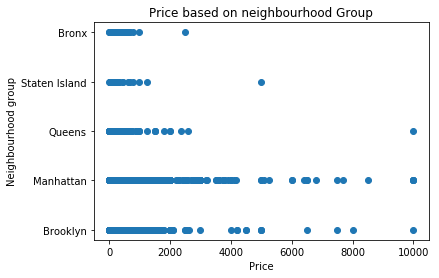

In [8]:
print 'Now based on the location we will determine which location are the most expensive'
plt.scatter(NY_listings.price,NY_listings.neighbourhood_group)
plt.title('Price based on neighbourhood Group')
plt.xlabel('Price')
plt.ylabel('Neighbourhood group')

we can also determine pricing based on the room type


Text(0,0.5,'Roomtype')

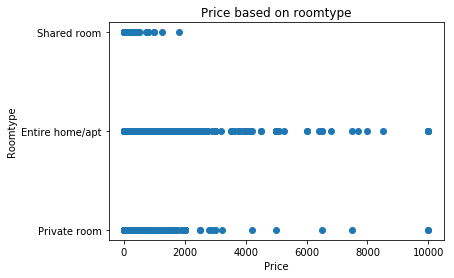

In [9]:
print 'we can also determine pricing based on the room type'
plt.scatter(NY_listings.price,NY_listings.room_type)
plt.title('Price based on roomtype')
plt.xlabel('Price')
plt.ylabel('Roomtype')

<Figure size 864x864 with 0 Axes>

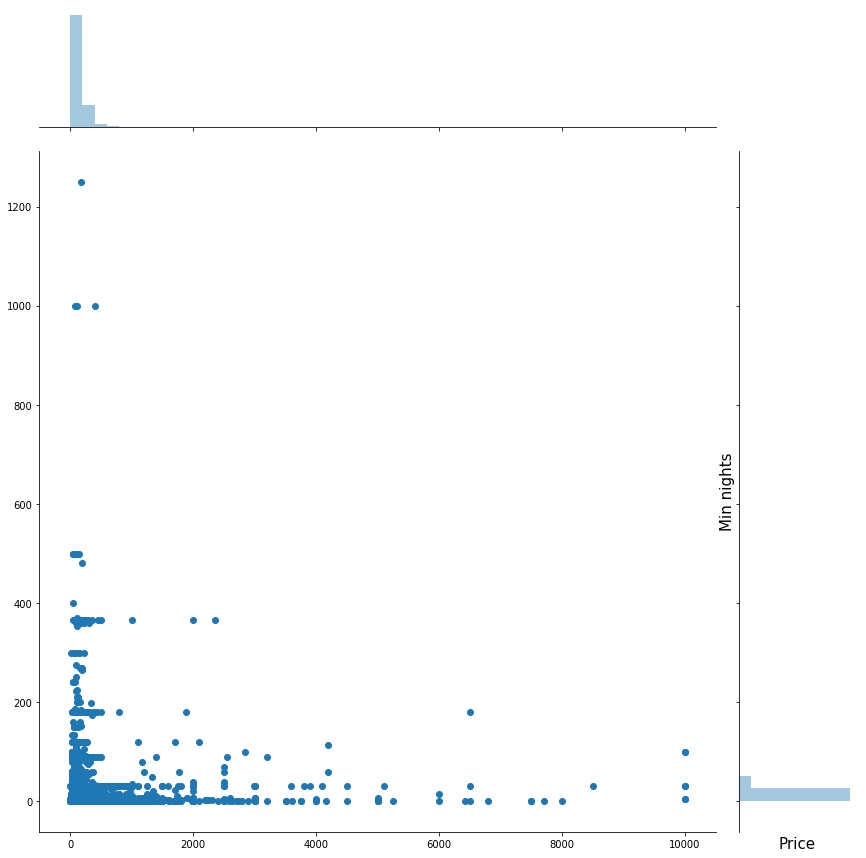

<function seaborn.utils.despine>

In [10]:
plt.figure(figsize=(12,12))
sns.jointplot(x=NY_listings.price.values, y=NY_listings.minimum_nights.values, size=12)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Min nights', fontsize=15)
plt.show()
sns.despine

In [16]:
NG_mean = NY_listings.groupby(['neighbourhood_group','room_type']).get_group(('Brooklyn','Shared room')).price.mean()
print ('the avg price in Brooklyn shared room price is %.2f '%NG_mean)

the avg price in Brooklyn shared room price is 50.53 


In [19]:
print ' we can use this to calculate a average value based on the acc_value that can be something like min night'
acc_value = 1250
first_price = NY_listings.loc[0,'minimum_nights']
first_distance = np.abs(first_price - acc_value)
print (first_distance)

 we can use this to calculate a average value based on the acc_value that can be something like min night
1249


In [20]:
print ('The 0 row will tell us how many Airbnb will offer us %.d minimum night'%acc_value)
NY_listings['distance'] = np.abs(NY_listings.minimum_nights - acc_value)
NY_listings.distance.value_counts().sort_index()

The 0 row will tell us how many Airbnb will offer us 1250 minimum night


0           1
250         1
251         3
750         5
770         1
850         1
880         1
884         1
885        29
886         1
890         5
896         1
950         6
951         1
975         1
980         2
985         1
1000        1
1010        3
1025        1
1028        1
1040        2
1050        4
1052        1
1064        1
1065        1
1066        1
1067        1
1068        1
1069        2
        ...  
1220     3760
1221      340
1222      203
1223       17
1224       16
1225       82
1226       14
1227        8
1228        8
1229      135
1230      223
1231        8
1232       28
1233       14
1234       18
1235      279
1236      562
1237       54
1238       91
1239       33
1240      483
1241       80
1242      130
1243     2058
1244      752
1245     3034
1246     3303
1247     7999
1248    11696
1249    12720
Name: distance, Length: 109, dtype: int64

In [22]:
print 'row       price'
NY_listings = NY_listings.sample(frac=1,random_state=0) 
NY_listings = NY_listings.sort_values('distance')
print NY_listings.price.head()
print 'this is showing the first 5 values from row 0 ,1 and so on.'

row       price
5767     180
2854     400
38664    110
13404     99
26341     79
Name: price, dtype: int64
this is showing the first 5 values from row 0 ,1 and so on.


In [25]:
mean_price = NY_listings.price.iloc[:5].mean()
print ('this would be the mean between the first 5 pricing above price for a min of %d night stay'%acc_value)
print mean_price

this would be the mean between the first 5 pricing above price for a min of 1250 night stay
173.6


# Evaluating model

In [26]:
NY_listings.drop('distance', axis=1)
train_ny = NY_listings.copy().iloc[:36671]
test_ny = NY_listings.copy().iloc[36671:]

In [27]:
def predict_pricing(new_list,feature_c):
    temp_ny = train_ny
    temp_ny['distance'] = np.abs(NY_listings[feature_c]-new_list)
    temp_ny = temp_ny.sort_values('distance')
    nny_5 = temp_ny.price.iloc[:5]
    predict_pricing = nny_5.mean()
    return(predict_pricing)

In [232]:
test_ny['predict_pricing'] = test_ny.minimum_nights.apply(predict_pricing,feature_c='minimum_nights')
print(predict_pricing)

<function predict_pricing at 0x0000000019579748>
